In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Read Data

In [3]:
df = pd.read_csv('Data_Negara_Help.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Hubungan ekonomi dengan harapan hidup per negara

In [4]:
df_ekonomi_hidup_drop = df.drop(columns=['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Inflasi',
                                'Jumlah_fertiliti', 'GDPperkapita'])
df_ekonomi_hidup_float = df_ekonomi_hidup_drop.astype(float)
df_ekonomi_hidup_float

,Pendapatan,Harapan_hidup
0,1610.0,56.2
1,9930.0,76.3
2,12900.0,76.5
3,5900.0,60.1
4,19100.0,76.8
...,...,...
162,2950.0,63.0
163,16500.0,75.4
164,4490.0,73.1
165,4480.0,67.5


## Describe data

In [5]:
df_ekonomi_hidup_float.describe()

,Pendapatan,Harapan_hidup
count,167.000000,167.000000
mean,17144.688623,70.555689
std,19278.067698,8.893172
min,609.000000,32.100000
25%,3355.000000,65.300000
50%,9960.000000,73.100000
75%,22800.000000,76.800000
max,125000.000000,82.800000


Finding outlier function

In [6]:
def find_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
    return df_final

def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_final

In [7]:
print(find_outlier(df_ekonomi_hidup_float['Pendapatan']))
print(find_outlier(df_ekonomi_hidup_float['Harapan_hidup']))

23      80600.0
82      75200.0
91      91700.0
114     62300.0
123    125000.0
133     72100.0
145     55500.0
157     57600.0
Name: Pendapatan, dtype: float64
31    47.5
66    32.1
87    46.5
Name: Harapan_hidup, dtype: float64


In [8]:
df_ekonomi_outlied = remove_outlier(df_ekonomi_hidup_float[['Pendapatan', 'Harapan_hidup']])

df_ekonomi_outlied.dropna(axis=0, inplace=True)

In [9]:
df_ekonomi_outlied.fillna(method = 'ffill')
sc= StandardScaler()
df_ekonomi_outlied

,Pendapatan,Harapan_hidup
0,1610.0,56.2
1,9930.0,76.3
2,12900.0,76.5
3,5900.0,60.1
4,19100.0,76.8
...,...,...
162,2950.0,63.0
163,16500.0,75.4
164,4490.0,73.1
165,4480.0,67.5


# std

In [10]:
df_std1 = sc.fit_transform(df_ekonomi_outlied)
# df_std1

In [11]:
kmeans1 = KMeans(n_clusters = 3, random_state=42).fit(df_std1)
labels1 = kmeans1.labels_
labels1
kmeans1

KMeans(n_clusters=3, random_state=42)

In [12]:
new_df_economy = pd.DataFrame(data = df_std1, columns=['Pendapatan', 'Harapan_hidup'])
new_df_economy['labels1'] = labels1
new_df_economy 

,Pendapatan,Harapan_hidup,labels1
0,-0.968447,-1.819188,0
1,-0.335927,0.714906,1
2,-0.110135,0.740121,1
3,-0.642304,-1.327498,0
4,0.361214,0.777943,1
...,...,...,...
151,-0.866575,-0.961883,0
152,0.163552,0.601439,1
153,-0.749498,0.311468,1
154,-0.750258,-0.394548,0


# Plot data

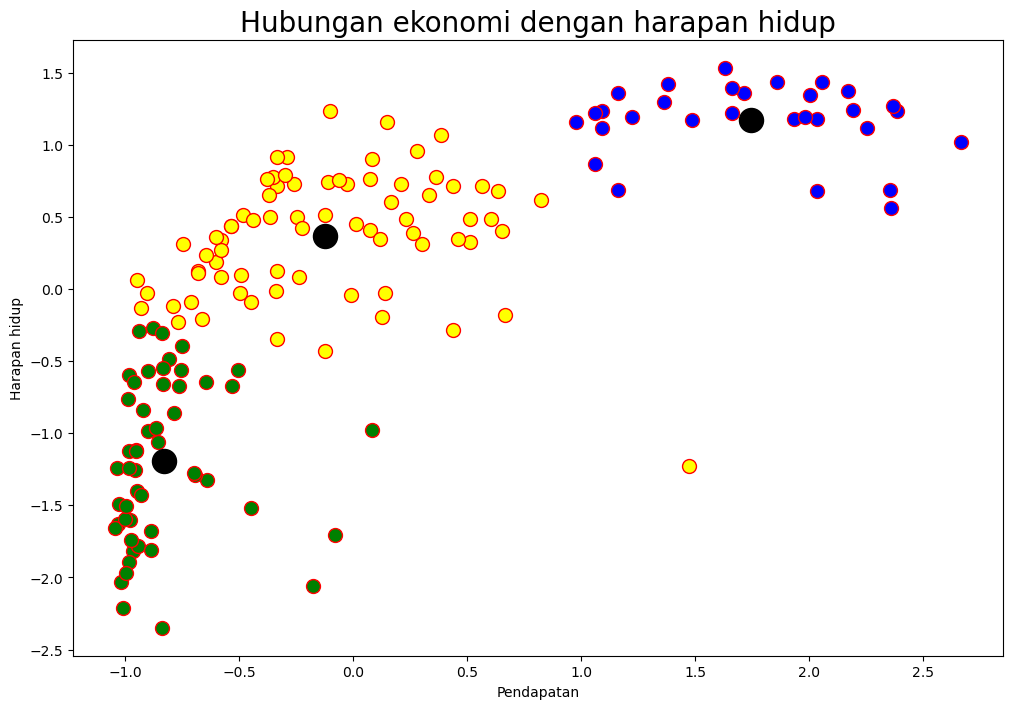

In [13]:
plt.figure(figsize=(12,8))

plt.scatter(new_df_economy['Pendapatan'][new_df_economy.labels1 == 0], new_df_economy['Harapan_hidup'][new_df_economy.labels1 == 0], c = 'green', s = 100, edgecolor = 'red')
plt.scatter(new_df_economy['Pendapatan'][new_df_economy.labels1 == 1], new_df_economy['Harapan_hidup'][new_df_economy.labels1 == 1], c = 'yellow', s = 100, edgecolor = 'red')
plt.scatter(new_df_economy['Pendapatan'][new_df_economy.labels1 == 2], new_df_economy['Harapan_hidup'][new_df_economy.labels1 == 2], c = 'blue', s = 100, edgecolor = 'red')
plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Pendapatan')
plt.ylabel('Harapan hidup')
plt.title('Hubungan ekonomi dengan harapan hidup', fontsize=20)

plt.show()

Insight = semakin besar pendapatan suatu negara, semakin besar pula harapan hidup rakyatnya

# Hubungan kesehatan dan kematian anak

In [14]:
df_kesehatan = df.drop(columns=['Negara', 'Pendapatan', 'Ekspor', 'Harapan_hidup', 'Impor', 'Inflasi',
                                'Jumlah_fertiliti', 'GDPperkapita'])
df_kesehatan_float = df_kesehatan.astype(float)

In [15]:
df_kesehatan_outlined = remove_outlier(df_kesehatan_float[['Kesehatan', 'Kematian_anak']])

df_kesehatan_outlined.dropna(axis=0, inplace=True)

In [16]:
df_kesehatan_outlined.fillna(method='ffill')

,Kesehatan,Kematian_anak
0,7.58,90.2
1,6.55,16.6
2,4.17,27.3
3,2.85,119.0
4,6.03,10.3
...,...,...
162,5.25,29.2
163,4.91,17.1
164,6.84,23.3
165,5.18,56.3


In [17]:
df_std2 = sc.fit_transform(df_kesehatan_outlined)

In [18]:
kmeans2 = KMeans(n_clusters = 3, random_state=42).fit(df_std2)
labels2 = kmeans2.labels_
labels2
kmeans2

KMeans(n_clusters=3, random_state=42)

In [19]:
new_df_wealth = pd.DataFrame(data = df_std2, columns=['Kesehatan', 'Kematian_anak'])
new_df_wealth['labels2'] = labels2
new_df_wealth 

,Kesehatan,Kematian_anak,labels2
0,0.352348,1.561948,2
1,-0.056882,-0.530491,1
2,-1.002483,-0.226291,1
3,-1.526934,2.380729,2
4,-0.263484,-0.709599,1
...,...,...,...
156,-0.573387,-0.172274,1
157,-0.708473,-0.516276,1
158,0.058338,-0.340011,1
159,-0.601199,0.598175,1


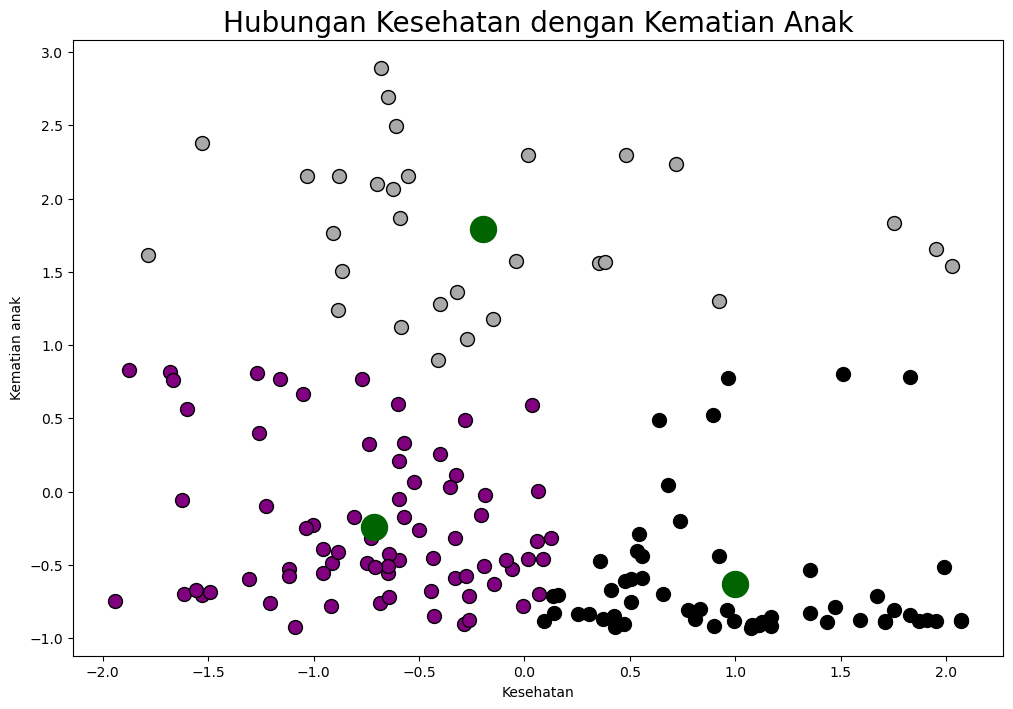

In [20]:
plt.figure(figsize=(12,8))

plt.title('Hubungan Kesehatan dengan Kematian Anak', fontsize=20)

plt.scatter(new_df_wealth['Kesehatan'][new_df_wealth.labels2 == 0], new_df_wealth['Kematian_anak'][new_df_wealth.labels2 == 0], s = 100, c = 'black', edgecolor='black')
plt.scatter(new_df_wealth['Kesehatan'][new_df_wealth.labels2 == 1], new_df_wealth['Kematian_anak'][new_df_wealth.labels2 == 1], s = 100, c = 'purple', edgecolor='black')
plt.scatter(new_df_wealth['Kesehatan'][new_df_wealth.labels2 == 2], new_df_wealth['Kematian_anak'][new_df_wealth.labels2 == 2], s = 100, c = 'darkgrey', edgecolor='black')
plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='darkgreen', s=350 )
plt.xlabel('Kesehatan')
plt.ylabel('Kematian anak')

plt.show()

Insight = Semakin rendah kesehatan angka kematian anak semakin padat, sementara semakin tinggi kesehatan, maka kemakian anak akan lebih menurun

# Korelasi antara import barang dan inflasi

In [21]:
df_import = df.drop(columns=['Negara','Kematian_anak','Ekspor', 'Kesehatan', 'Pendapatan', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'])
df_import_float = df_import.astype(float)

In [22]:
df_import = remove_outlier(df_import_float[['Impor', 'Inflasi']])

df_import.dropna(axis=0, inplace=True)

In [23]:
df_import.fillna(method='ffill')

,Impor,Inflasi
0,44.9,9.44
1,48.6,4.49
2,31.4,16.10
3,42.9,22.40
4,58.9,1.44
...,...,...
161,28.5,16.50
162,52.7,2.62
164,80.2,12.10
165,34.4,23.60


In [24]:
df_std3 = sc.fit_transform(df_import)
# df_std3

In [25]:
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(df_std3)
labels3 = kmeans3.labels_

In [26]:
new_df_import = pd.DataFrame(data = df_std3, columns=['Import', 'Inflasi'])
new_df_import['labels3'] = labels3
# new_df_import

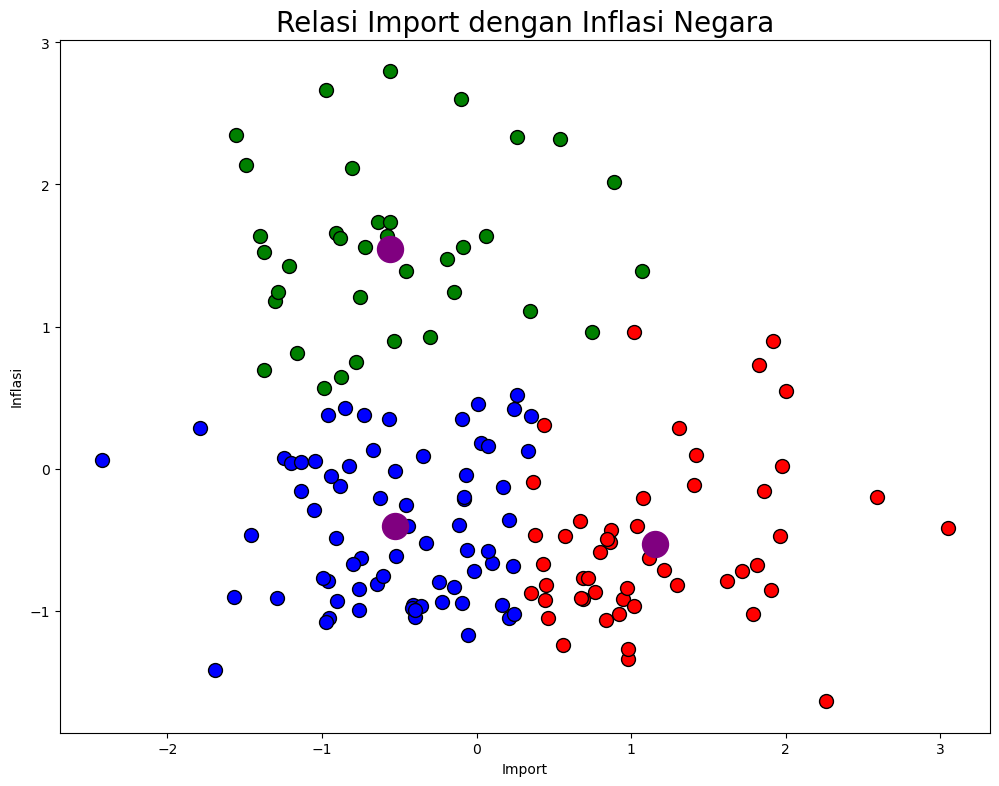

In [27]:
plt.figure(figsize=(12,9))

plt.scatter(new_df_import['Import'][new_df_import.labels3 == 0], new_df_import['Inflasi'][new_df_import.labels3 == 0], c = 'red', s = 100, edgecolor = 'black')
plt.scatter(new_df_import['Import'][new_df_import.labels3 == 1], new_df_import['Inflasi'][new_df_import.labels3 == 1], c = 'green', s = 100, edgecolor = 'black')
plt.scatter(new_df_import['Import'][new_df_import.labels3 == 2], new_df_import['Inflasi'][new_df_import.labels3 == 2], c = 'blue', s = 100, edgecolor = 'black')

plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], c = 'purple', s = 350)

plt.title('Relasi Import dengan Inflasi Negara', fontsize = 20)
plt.xlabel('Import')
plt.ylabel('Inflasi')

plt.show()

Dapat disimpulkan, semakin tinggi nilai import suatu negara, maka semakin rendah nilai dari inflasi

# Kematian anak, harapan hidup dan fertiliti


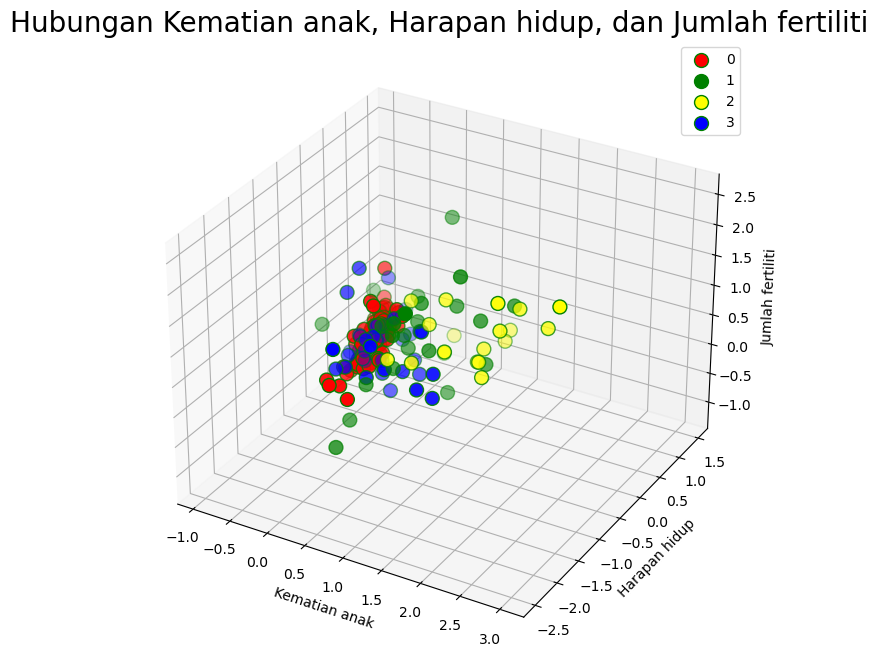

In [28]:
df_3d = df.drop(columns=['Negara', 'Ekspor', 'Kesehatan', 'Pendapatan', 'GDPperkapita', 'Impor', 'Inflasi'])
df_3d_float = df_3d.astype(float)
# df_3d_float

df_3d_outlied = remove_outlier(df_3d_float[['Kematian_anak', 'Harapan_hidup', 'Jumlah_fertiliti']])
df_3d_outlied.dropna(axis = 0, inplace = True)

df_3d_outlied.fillna(method='ffill')

df_std3d = sc.fit_transform(df_3d_outlied)

kmeans3d = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std3d)
labels3d = kmeans3d.labels_

new_df_3d = pd.DataFrame(data=df_std3d, columns=['Kematian_anak', 'Harapan_hidup', 'Jumlah_fertiliti'])
new_df_3d['labels3d'] = labels3d

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df_3d['Kematian_anak'][new_df_3d.labels3d == 0], new_df_3d['Harapan_hidup'][new_df_3d.labels3d == 0],
            new_df_3d['Jumlah_fertiliti'][new_df_3d.labels3d == 0], c = 'red', s = 100, edgecolor='green', label=0)
ax.scatter(new_df_3d['Kematian_anak'][new_df_3d.labels3d == 1], new_df_3d['Harapan_hidup'][new_df_3d.labels3d == 1],
            new_df_3d['Jumlah_fertiliti'][new_df_3d.labels3d == 1], c = 'green', s = 100, edgecolor='green', label=1)  
ax.scatter(new_df_3d['Kematian_anak'][new_df_3d.labels3d == 2], new_df_3d['Harapan_hidup'][new_df_3d.labels3d == 2],
            new_df_3d['Jumlah_fertiliti'][new_df_3d.labels3d == 2], c = 'yellow', s = 100, edgecolor='green', label=2)                          
ax.scatter(new_df_3d['Kematian_anak'][new_df_3d.labels3d == 3], new_df_3d['Harapan_hidup'][new_df_3d.labels3d == 3],
            new_df_3d['Jumlah_fertiliti'][new_df_3d.labels3d == 3], c = 'blue', s = 100, edgecolor='green', label=3)

plt.legend()
plt.title('Hubungan Kematian anak, Harapan hidup, dan Jumlah fertiliti', fontsize =20)
plt.xlabel('Kematian anak')
plt.ylabel('Harapan hidup')
ax.set_zlabel('Jumlah fertiliti')

plt.show()